In [12]:
#Importing needed libraries
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
import numpy as np

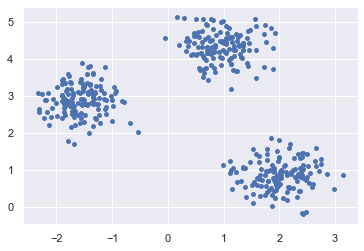

In [2]:
X, _ = make_blobs(n_samples=420, centers=3, cluster_std=0.40, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s= 15)

In [5]:
#KMeans algorithm
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [7]:
ids = kmeans.predict(X)

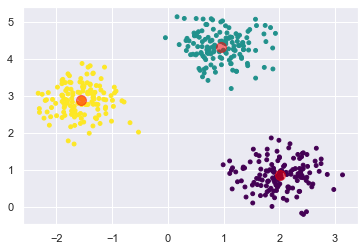

In [10]:
plt.scatter(X[:, 0], X[:, 1], c = ids, s= 15, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 100, alpha=0.5)

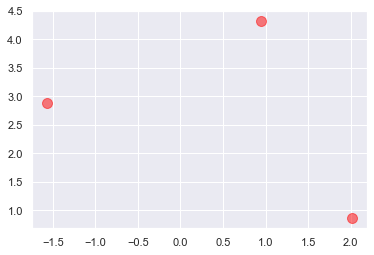

In [13]:
#This function computes for each row in X, the index of the row of Y witch is closest
def find_clusters(X, n_clusters, rseed = 69):
    #Randomly guess some cluster centers
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[: n_clusters]
    centers = X[i]
    while True:
        #E-Step : Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        #M-Step: Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        #Check for covergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels

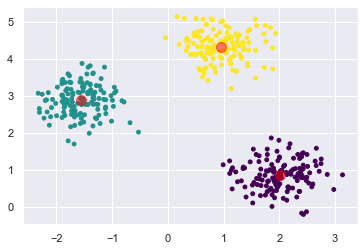

In [14]:
#Applying it on our data set
centers, labels = find_clusters(X, 3)
plt.scatter(X[:, 0], X[:, 1], c=labels, s = 15, cmap = 'viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s = 100, alpha = 0.5)

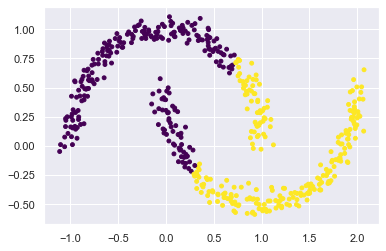

In [15]:
from sklearn.datasets import make_moons
X, _ = make_moons(500, noise = .06, random_state=69)
labels = KMeans(2, random_state=69).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s = 15, cmap = 'viridis')

In [16]:
#Soectral Clustering estimator
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')

c:\users\pulbe\appdata\local\programs\python\python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


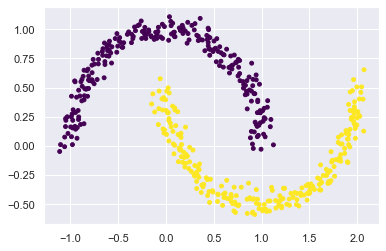

In [17]:
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s = 15, cmap = 'viridis')

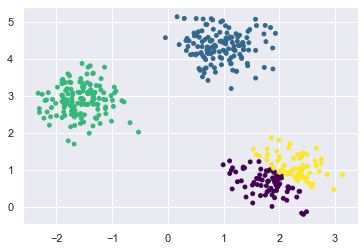

In [18]:
X, _ = make_blobs(n_samples=420, centers=3, cluster_std=0.40, random_state=0)
labels = KMeans(4, random_state=420).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s = 15, cmap = 'viridis')

## Silhouette Score

In [19]:
#importing libraries
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

In [39]:
def draw_silhouette_plot(X, n_clusters):
    clusterer = KMeans(n_clusters = n_clusters, random_state=69)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    #Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    #The Silhouette Score ranges from -1 to 1
    plt.xlim([-1, 1])
    #The n_clusters + 1 * 10 is for insterting black space between plots
    #to demarcate them clearly
    plt.ylim([0, len(X) + (n_clusters + 1 ) * 10])
    plt.yticks ([]) # Clear the yaris labels
    plt.xticks ([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort ()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color , edgecolor=color , alpha=0.7)
        # Compute the new y-lower for next plot
        y_lower = y_upper + 10 # 10 for the 0 samples
    # The vertical line for the average silhouette score of all the values
    plt.axvline (x=silhouette_avg, color="red", linestyle="-")
    plt.title(f'The Silhouette Plot for n_clusters = {n_clusters}')
    plt.legend(['Silhouette Score'] + [f'Cluster {i}' for i in range(n_clusters)])


Enter the number of clusters: 2


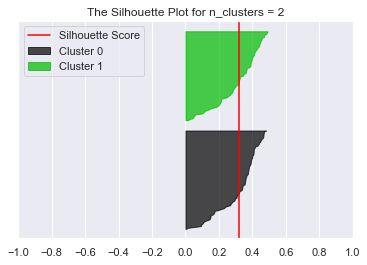

In [41]:
draw_silhouette_plot(X, int(input('Enter the number of clusters: ')))


Enter the number of clusters: 3


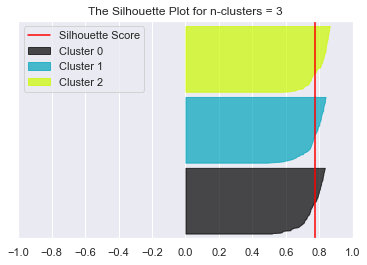

In [27]:
draw_silhouette_plot(X, int(input('Enter the number of clusters: ')))


Enter the number of clusters: 4


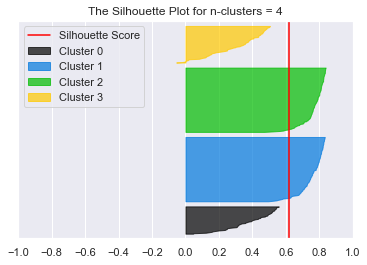

In [25]:
draw_silhouette_plot(X, int(input('Enter the number of clusters: ')))

Enter the number of clusters: 5


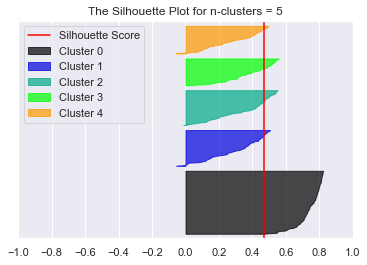

In [28]:
draw_silhouette_plot(X, int(input('Enter the numbdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAW8AAAEJCAYAAABbkaZTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjQuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/MnkTPAAAACXBIWXMAAAsTAAALEwEAmpwYAAA7w0lEQVR4nO3dd3wUdf7H8ddsyaaSBBKqdEhAECSA0ptITQjFghSJAQRRkEMEKR4ocChnRSwHgtjAU+8UCyqniJ4dFH+id4qKCkpLJW3rzPf3R8weMZT03c1+njzyIJvMzrx3svlk9rvf+YymlFIIIYQIKCZfBxBCCFFxUryFECIASfEWQogAJMVbCCECkBRvIYQIQFK8hRAiAEnxrmGrV68mNTWV1NRUOnfuzPDhw723HQ4HiYmJZGdnV2kbX375JVOnTiUlJYXk5GRmzJjB999/D8CBAweYN28eALfddhubN28GqJbtlld6erp3Wy+88ALPPvtshe7/6aef0qVLF1JTUxk7diypqamMHz+e3bt3A/DQQw9x5513VijH6QoKCpg4cSKjR4/mrbfeqlC26lTex3E2y5cv5+uvv67GRJVz1113MWjQIO/zfP78+b6OVCdZfB2grlu+fLn38yFDhnDPPfdw0UUXVdv6XS4Xs2bNYsuWLXTq1AmAHTt2MHPmTN555x0uuugi1q9fX23bq4wPP/zQ+/nnn39O+/btK7yOFi1asGPHDu/tb7/9lmuuuYZ33nmnUjlO99///pesrCz+9a9/VTiXP/noo4+4+uqrfR2D/fv3c99995GUlOTrKHWaHHn7gYceeojx48czZMiQUkelL7zwAuPHj2fs2LGkpaXx448/lrmv3W4nPz+foqIi79fGjBnD7bffjq7rfPrppyQnJ1douw8//DCjRo0iJSWFefPmkZGRAcDUqVN58803vcudfvvHH38kPT2d8ePHk5qayosvvgjAkiVLAJg2bRovv/wyu3fvZuvWrd7tPfroo4wbN47U1FTmzJnDiRMnyrXPOnToQGhoKL/99lupr3///ffeVyFjxozh5ZdfLpPj2LFj3uUPHTrE0qVLOXHihPfV0Ntvv83YsWNJSUnhmmuu4auvvvLur+nTp5OSksLChQtLbffXX39l6NChrFq1iiuuuILLL7+cnTt3njG7x+Nh7dq1DB8+nFGjRrFs2TJcLlepZYYMGcKBAwfK3PZ4PKxYsYKUlBTGjx/PvHnzKCws5P777+fkyZMsXLiQ//u//yM/P5/bbruN8ePHk5KSwl/+8hc8Hg8AnTt35uabb2b48OEcOHCA9evXe9c3ffp0Tp48WSbz6a8gSz6uvPLKMsu5XC7+85//sGXLFsaMGcPcuXM5evToGfeDqCIlas3gwYPVV199VeprCQkJavPmzUoppb755hvVuXNn5XK51KeffqomTZqkioqKlFJK/fvf/1YjR44843q3bNmiunTpooYMGaIWLlyoXnjhBe/9PvnkEzV69GillFKLFy9Wjz/++Dm3++KLL6qrr75aFRYWKqWUWr9+vUpPT1dKKTVlyhT1xhtveLdbctvtdqtRo0apr7/+WimlVF5enho5cqTav3+/d1tZWVllMrz00ktq/vz5yu12K6WUeu6559SMGTPKPL7TH0OJt956S/Xp00cVFRWp9evXqzvuuEO53W512WWXqbfeeksppdTx48dV//791RdffFEmx9nW/8MPP6g+ffqow4cPK6WU+uijj1Tfvn1Vfn6+Wr9+vRo+fLg37+mOHDmiEhIS1O7du5VSSr355ptq0KBBZX9YSqknn3xSTZ48WdntdqXrurr55pvVSy+95H0cSpV9rpTc3rt3rxoxYoQyDEMppdS6devU559/XuY+t912m3rqqaeUUkp5PB61cOFCtXHjRu9+eOmll5RSSh09elQlJSUpp9OplFJq8+bN6l//+tcZc5fH4cOH1YwZM9SPP/6oDMNQmzZtUqmpqd68ovrIsIkfKDky7tixIy6Xi4KCAvbs2cMvv/zCxIkTvcudOnWK3NxcYmJiSt3/uuuu48orr2Tv3r3s3buXTZs2sWnTJu/Rb0W2+/777zN+/HjCw8MBuPbaa3nsscfKHBme7ueff+bw4cMsXbrU+zWHw8F//vMfLr744rPe79133+XAgQNMmDABAMMwsNvtZ1z28OHDpKamAsVHro0bN+aRRx4hLCysVA6n08mwYcMAaNSoEcOGDePf//433bp1O+e+KPHJJ5/Qq1cvmjdvDkDv3r2pX7++dyz54osvxmI586+N1Wpl4MCBAFx44YXk5uaecbmPPvqI1NRUQkNDAXjggQeA4iP780lISMBsNnPllVfSr18/hg8fTpcuXcost2fPHg4cOOB9DjgcjlLf79GjB1C8jzp06MC4ceMYMGAAAwYMoHfv3mXWt3r1avbu3VvqayEhIbzwwgulvta8eXM2bdrkvT19+nQeeeQRfv31V+8+FdVDircfKCkGmqYBoJTCMAxSU1O59dZbgeLCdvLkSaKjo0vd9/PPP2f//v3MmDGDwYMHM3jwYBYsWEBKSgoffvghsbGxFdqu+kOrG8MwvC+3S5Yp4Xa7AdB1nXr16pUak87MzCQqKuqcj9swDGbMmMGkSZOA4pfcp06dOuOyfxzzPtv6/kgpVSr/+fzx8f9xHSV/1M7EarViMhWPRJbsU4CZM2d6hyLmzZtXpvhnZmaeNXuJkj+eJfv5iy++4JNPPmH+/Plce+21pKWllbqvYRg8+OCDtG3bFoC8vLxSmUoeh8lk4plnnuHAgQN8/PHH/OUvf+HSSy8t9V4NUOb22Xz77bd8++23jB07ttTjsFqt5bq/KD8Z8/ZTffv25fXXX/f+0m/fvp1p06aVWa5+/fo8+uij7Nu3z/u1jIwM7HY7CQkJFd5uv379+Oc//+kdQ3/66afp2bMnISEhpY5ADx8+zHfffQdA69atsdls3uJ67NgxkpOTvcuazWZv8Tv98379+vHiiy9SUFAAwIMPPsiiRYsqnLlE69atsVqt7Nq1C4ATJ07w1ltv0adPnzLbPptevXrx4YcfcuTIEQA+/vhjjh07RteuXSuda9OmTezYsYMdO3Zw2WWX0bt3b1577TVcLheGYbBy5Upef/31Uvc5fV9/+eWX3vcd3n33XdLS0ujWrRtz585l7NixfPvtt2UeX79+/di6dStKKVwuFzfccAPPPPNMmWzffvstycnJtG3bllmzZpGWlub9uVaGyWRizZo13v23bds2EhMTady4caXXKc5Mjrz9VP/+/Zk5cybp6elomkZkZCQbNmwodfQExQXr4Ycf5v777+f48ePYbDaioqK48847adOmjfeXvryuuOIKjh07xpVXXolhGLRs2ZJ77rkHgBtuuIHbbruN9957jzZt2nhfeoeEhPDII4+wZs0aHn/8cTweDzfffDPdu3cH4PLLL2fSpEk88sgjDBgwgFWrVgHFR6QnTpzgqquuQtM0mjRpwl133VXpfWa1WnnkkUdYvXo1Dz30ELquc+ONN9KrV68yOc72h61du3asWLGCm266CV3XCQ0N5bHHHjvvq4iKmDhxIr/99hvjx49HKcUll1zC1KlTefTRR73LLFy4kJUrV/L3v/+dTp06eWcSDRgwgPfff5/k5GTCw8OJjo727s+hQ4fypz/9idWrV7Ns2TLWrFlDSkoKbrebPn36MGPGjDJZOnTowMiRI5kwYQLh4eGEhoaW+yj7TBISEli+fDk33HADuq7TuHFj7rvvvkqvT5ydps70OlEIIYRfk2ETIYQIQFK8hRAiAEnxFkKIACTFWwghApAUbyGECEBSvIUQIgBV6zzvnJxCDMO3Mw8bNIgkK6sg6DP4Sw7J4F85KpIh6vrrAMjf+IRPc9QUf8hgMmnExkZU6r7VWrwNQ/m8eJfk8DV/yAD+kUMy/I8/5Ch3huPHK7Z8TeWoQf6QobJk2EQIIQKQnB4v6j7dhcn+2/mXq2kFkZjsPh6+qUAGzXAC/GHfaRihTeAPbRpE7avx4q2UIicnA5fLAdT8S5STJ01n7NBWm/whQ83n0AgJCSU2Nr5MvxW/8+Pfid63GmWt59scFjP1PHrAZDDnFTe8qvfp1OIv6HaUJYr8npsxwqW9q6/VePEuKDiFpmk0anQBmlbzozQWiwmPx7eF0x8y1HQOpQxyczMpKDhFVFRMjWyj2igPyhyGYYvzbY4QC4ar/O1pfZ3BbCpu42rY4sBwYdYdOJsmS+H2EzVeTe32AqKiYmqlcIvao2kmoqJisft6GEDUHAUoA3PBD2i6HVf8QBwtJvs6lfhdjR95G4aO2SxD63WR2WzBMHw8DCCqn6cIk6cQlBtMNuxtZuFoMxPkAMyv1MpPw+/HREWlyM+1DlIKkzuXovY3o9frhKdeRxxtZ0nh9kNB9xN59923SU+fwrRp13DttVezbdtT3u8tXDiPzMwMdu58lTVrVgJwxRUpHDtWc1e/Pnr0N9auvROAgoICliy5pUL3/+GH75k3bzbTpl3DlClXcdddq856HUghzkXzFGBynMBTvyeuZqkok1y6zJ8F1XhGRsZJNmx4gC1bniE6OoaioiJuuul6WrRoSb9+A7nnnvW1nun48WP89tuvAOTn5/H99wcrdP8VK5awZMmf6dy5C4ZhcN99d/P4448yd+6Cmogr6hjNfQrNYweTBWUOp6DLOjwNLpWpgAEgqIp3bm4uHo8Hh8NBdHTxRViXL19JSIgNKD7Kfuihv5W53xNPbOL777/D4XCwfPmddOrUmcOHf2HdujXk5+cRGhrG/PkL6dixE2vWrKR79x6MGFF8ZfZ+/XrwwQf7KCoq4r777ubQoR8xDIPJk6/l8stH8OCD93D06G/ce+/dnDx5nMzMDJYsWcjatffwxhuv8cIL2zEMRWJiBxYsWIzNZiuVLSsry3tlcJPJxHXXzeTYsWMAHDt2lFWrVpKTk01oaCiLF99Ou3btef31V3juuWfQNI3ExI786U+LCA8PJzl5KAkJHcnOzuLxx59i+/ZnePfdf6HrBpde2osbbpgnQyV1hVJonjxQHooS/oQe2Ra9Xgcwhfg6mSinWi3etr9vI3R72YugVgfHNVNwXj3pnMu0b59A//4DueqqVBISEunWrQeXXz6CCy4499SnVq3asHTpCv7xj7+zffvTrF59N6tW3c6UKWkMHDiEr78+wPLli9m+/Z9nXceTT24mMbEjy5ffQWFhAbNnp3PhhZ25+eaFbNmykVtuWcyxY0eZO3cWa9few6FDP/Lqqy/z6KNbsNlsPPbYBrZvf5q0tNLXIZw3bwG33baAuLh4unXrQf/+A+nTpx8Af/3rXQwcOIQJE67i448/4MknN5OWNoOnntrCxo1biY6O4d577+aJJzZx4403k5uby5Qp00hK6sEnn3zEd9/9l02bnkLTNFat+jO7dr3B8OGjyvkTEf7M5MzAsDXE3m4O7oaDfB1HVEJQHXkDLFy4hGnTpvPZZ5/w2WcfM2vWdaxYsYqBA4ec9T4DBgwCoHXrtuzZs5uioiJ+/fVX7306d76IevXqcfjwL2ddx759n+F0Onj99VcAcDgc/PTTIcLDw8+4/P79+/j11yPMmlXcHMjjcZOQ0KHMcqNGpTBo0BD27v2Mffs+4y9/Wcnll4/k5ptvYf/+z1mxYjUAvXv3o3fvfvzjH3+nb9/+REfHADBmzDjWrr3Du75OnTp78/7nP18zfXrxCRpOp4NGjeQK4AFNGWA/gcljoIc1oyDpYVRIjK9TiUqq1eLtvHrSeY+Oa9JHH32A3V7EZZcNY/ToMYwePYZXXnmJ117bcc7ibTabvZ8rpVDK4I/XbVYKdF3/fVih+Hsez/9OhjAMndtvX0ViYnEBzs7Ool69aL766sszblPXDYYMGcr8+bcCUFRUhK6XnpZ35Mhh3nlnF2lpMxg4cDADBw7mqquu4brrJnHzzbdgsfzvx6uU4ueffzpDIx5Var02W6g371VXXcPEiVMAyM/PL7UfRIDRHZhcOdByGPmNrkGPaCvj2gEuqGabhIaG8thjD3tnjxQXtEO0b59YofVERETSrNkFvPfebgC+/voA2dlZtGnTlujoGA4dOgTA++/v8d4nKaknL7/8IgCZmZlMm3YNJ04cx2y2eIun2Wz2ft6tW3fef38POTnZKKW49961PP/8tlI5YmJieeGF7Xz++V7v13766X+P5+KLk3j77V0A7Nv3KevWraFbt+588MH75OWdAuCVV16mW7ceZR5jUlJP3nprJ0VFRXg8HpYsuYU9e96p0H4SPmS40VzZmBwnMDkz0FDY290El96NHtlOCncdEFTDJklJPUhPn8miRfO9R8WXXtqb666bWeF1/fnPq/jrX//C5s1/w2oNYc2adVitVsaOncDKlUuZNm0iSUk9adCg+JTs9PSZ3Hvv3UydehWGYTBnzjyaNbuAyMhICgryWbXqdpYsWUGjRo2ZO3cWDz30N667bibz5s1GKUX79olMmZJWKkNUVBTr1j3Io4+u5667VmO1WmjRoiUrV64BYOHCxaxZcycvvfTi729YLqd16zZMnXodN910PR6Ph8TEjtx665Iyj69fvwH88MNBrr8+DcPQufTSPowcmVzh/SRqmOEB5UYzXMUF2/CAyYzSQvDE9sQd1xdPvY4YEW2KC7YU7TpDU398/V8FWVkFZV6WHz/+C40bt6yuTZyXP/QV8YcMtZXjfD/f+PgoMjLyazTD+cRnv4j7ywcxwpr4NIctxIKzsr1NjN8LtPKA4UFT7uLCbQlHtzVEhTZGD2uKEdEKT3RX9Mg2oJUd5qrIzyN6bPGb06de3lm5zOfgF88LP8hgMmk0aBBZqfsG1ZG3EAFFKTS9EM2dj6bceKI6okIaoIc2xLDFo2zxuBoOAkvlfvlFYJPiLYS/UAoMJ5pehKa7QDNhhDXD2XQc7vh+6PU6+jqh8CNSvIXwFe+RdQGYLKA8GLZ4PNGX4o7tjh6VgF6vk4xTizOS4i1EbVMKkzMTUBhhTXC0mIoefSF6RBuUNcrX6USAkOItRE0yPMVDIcoDhsLkcv5+hN2Qwi53o0e2lyNrUSlSvIWoTsoAw4XJXQCaQmlWjLAmGCENILYZDj0GI6Q+ntgkjIjam4Ul6h4p3kJUhVKYXFm/f64Xv8kY0gB3g144Wl2LHtXeO2UvLD4Kh4+npom6o9aLd1raJI4cOVzt623evAVbt24773KFhQU89tjDfPnl55jNFqKiorjppj+RmNiBL77Yx5YtG9mwYWOFtl1QUMCaNStYu/beysZn1643eeqpzbjdbq66ahITJlxV6XWJWqAMNE8BmicfT/2e2NvdhGFrhLJEyjCIqBW1XryPHDlMkyZNa2S952MYBgsX3kxSUg+eeGIbFouFL77Yx8KF83jmmecrve3K9OE+XUbGSTZteoTNm5/Gag1h9ux0kpJ60Lp1m0qvU9QAw43Jlf37kbSBJzIRZ7OxuJuM9HUyEYSCqrfJF1/sIzMzk+nTZ3mbNiUl9WDp0j9jGKXPRLzppuv54ot9QHFf7CuuSAGKj5DT0iaRnj6F5csX4XQ6eeCBv3r7cAPs3Pka6emTSUubxNq1d+J0OgFITh7KggVzSUubVKpp1b59n5GU1IN69aIJCwtj8ODLpI+In9E8BZicJ3E0n0h+0gZy+79FQY+/SeEWPhNUxfvgwe/o2PFCTKbSD7t3737ExtYv1zo2bXqU++/fwJYtz9CiRSsOH/6Z+fNvJS4u3tuHe8eOf/Loo1vYunUbsbH12b79aQBvv+ytW7eV6viXmZnh7YEC0KBBHCdPnqyGRywqzfCguXIw2Y9hcpxAmcMpSlyEo+1s9HoXgtl2/nUIUYOC6g1Lk0kr08q1ovr27c8NN0ynf/9BDBw4hPbtE0td43L//n0cOXL2Ptwl/bJPd6ZMJpOMm9YapQDj954hHlAeNHd+cVOn6C4YES1xx/YAy5l7rwvhC0FVvDt0uJCXXnoRpVSpy3n97W8P07PnpaWWPf37pw9xzJ+/kB9+SOXjjz9g1arbSU+/ni5dLvZ+X9cNLrvscm6+uXgI5Y99uEv6ZZ8uPr4h//d/+723s7IyiYuLr/wDDTa/T8/TDGfx//rv/xtuMJxw8jNM7hyUyYqGKp57bbKgMKGhg6GD2YZhicIIiUNZY/HEdMHROt3Xj0yIswqq4t21azdiY+uzZctG0tJmYDab+fTTj9m58xWuvHIiP//8k3fZ6OgYfvrpR5KSevDvf+8Biov4lClXsmHDRqZOvQ6Px8PBg9/RrVv3Un24n3vuGa69Np2YmFjuvXctTZtewPTps86aq0ePS9iyZSM5OTmEhYWxZ89uFi1aWoN7oo5QBtEfpKC58wADTSlALz6SVgZgFP9v1tAj2uCK6wumMAxbA4ywZhihjYsbPFmj5NqNIuDUevFu3rxFjU0VPB9N07jrrvt46KF7ufbaq7FYLERHx/DXvz5I/foNShXvyZOvZc2albz++iv07z8IAIvFwvTps5g/fw42WyiRkVEsX76S2Nj6pfpwT59+/Tn7cP9RfHxDZs6cw7x5s3C7PaSkpHLhhWWHV8QfadjbzCoe6jiHevXCyLd2wQhrVku5hKh50s+7jmaorRwB0c/bDzL4Sw7p5+1fGarSzzuoZpsIIURdIcVbCCECUFC9YSmC03d8x6uhb6Ip306/jCKUfJsjYDJcZToOwPO2Jyq8HV3T6eq5mCRP2Ytbi+ohxVvUeR/yIQ+G30sDo4FPc1gw4wnTz7+gn2QYaDoGwNNh5S/euVouJkyEqwiut98gxbsGSfEWdZ6GRn2jPo2Mxj7NEYIFl1HJCxD7IINV/QJQ7v3mxo3FZOWugnto70kkHDmpqSZJ8RZCVJkTJzmmbMY6r6Crp5uv4wQFH7SEPcWRI9X/0rF5czNbt0afdzl/bQlbkm327HTWrXugRjovClETHDjIMmUx0z6ba5xTfB0naPigJaxOkybmGlnv+fhrS1iAb775mnXrVtfICUxC1JRMLZMIIpjkmMKVzoloSE+e2hJUUwX9tSUswKuvvsSCBYulp4kIGNlaNhFE8Hjek8x03IAVq68jBZWgKt7+2hIW4LbbbqdrVxkrFP5NoXBg54TpBGGEcU/+g8Sq8v3uiOoVVG9Y+mtLWCECgY7OCdNx4lQ819vnMM45AUtwlRC/ElR73l9bwgrhz3R0irRC8rR8xjhTmW+/Vca2/UBQDZuc3hK2pKCWtIRt1ap1qWVLWsICpVrCTpw4jpiYGKZOvY4RI0Zz8OB3mM3mUi1h33vvXXJyslFKce+9a3n++fNfGFkIf6BQ2LGTp53Co7lxaS4Omw/TQm9Nun0mN9rnS+H2E0F15O2vLWGF8AcGBhmmk4SpcBL0jsQYv2HDxob8x+jm6e7reOIPar0lbE3P8/aHdqz+kKG2cgRCS9jX4l/kAfeDNDaa+DRHiM2Cy+njMyz/kMHAwImTbFM2Fiy01tuwonAVzYwLpCVsLahKS9haP/Iuz4k0QoiaYWCQp+Vh14owY0ZHp5HRmDHOscy230QYYb6OKMopqIZNhAhmRRSRzyk66J3o6+5PkqcHrfTWhCCXgAtEUryFqIOK52M7yDPlYcaMQmHFwv3cT+cC6fRXF0jxFqKOUCjcuMk15QIQa9Rnqj2Ni/QuNDWaEW80pFF8NBn4/pJwouqkeAsRoEqm9RWYCtDQMNCpp6Lp4OnIHPs8EvUOMq2vDpPiLUQAytfyKdQKaWw04dqidPq6+xOrYuWMxyAiP2khAswp7RQFWgF/LryTwe7LfB1H+Ejt9/P++g2OOKp/zK15aBRbO48873L+2s97y5aN7N79NgB9+vRlzpybK70uUfcolHdOtkOzc1/Bei72JPk6lvCh2u/n7ciniS2iRtZ7Pv7az3vv3k/Zu/cTnnjiWTRN45Zb5vLee+8ycODgSq9TBB4PHgq0fFyaC4XCjOX3sWwDHZ0QrNQ3GjC96Ho541EE17DJ6f28S9rCnqufd3r69SQl9eDYsaPMnTuLF198lV273mTbtqcwmUw0bdqU229fVaqf99q197Bz52s899yzGIYiMbEDCxYsxmazkZw8lISEjmRnZ/H4409528I2aBDHjTf+Cau1uB9yy5atOHHieO3uHOFTTpxkmTLp7e5HK721d3ZIjIohWkUTbcQQijQ1E/8TVMX7XP28AX766dB517Fp06Ns3PgEsbH12bjxEW8/77lzZ5Xp522z2XjssQ1s3/40aWkzvP28k5JKz7Nt06at9/MjRw6ze/e/ePTRLdXwiIU/USg8eNDx4NE8lPxzax5shDDdMYvJjmt9HVMEiKAq3v7ez/vQoR9ZtGg+N944n+bNW1Qpp/AdFy4cmh2H5gDARPFl/zQUZs1KtIom3mhErBFLfSOONnpbLncNJ5LK9bgQwSmoirc/9/P+6qsvWb58MfPmLWDo0OFVepyi9ujo3jcRXZobEyYiVATt9UQS9ERa6W1oZDSiodGIjg3acOqU09eRRR0RVMX79H7eaWkzMJvN3n7eV145sVRL2JJ+3klJPUr1854y5Uo2bNjI1KnX4fF4OHjwO7p1616qn/dzzz3DtdemExMTy733rqVp0wuYPn3WWXOdOHGcpUsXcscda+nevWcN7gFxJgYGBVoBBjpGyT+teHaHwkDDhAkTWsk/pQEKXdMxYaaJ3pQenktI1DuQ6OlIJ73zGU+OKe4hIsVbVI9aL97NQ6NqbKrg+fhrP+/t25/B6XTx0EP3e782dux4xo69olL7QpRmxkyhVkSWKeuM39fx0MFzIbEqljAVTqgKJUJFEK4iCCUMm7JhIwSrCsGGjRAVQriKoLHRmBgVK2cxCp+o9X7eNc0femn7Q4bayhEI/byj4q0cyDr7VE4rVpoazWq8CPvDvqhIBunnXfMCqp+3ELUtlFBaGa3Pv6AQASSormEphBB1hRRvIYQIQDJsIuq83Sd+Zs2Bj7GZzD7NYbNZcPr4GpYVyXBXYTYAtx14o0LbyPE4uKNtH7rVa1ThfKL8pHiLOu/nojx+debTKCTcpzlcHh2XXv0X366pDLoqfrO7QHeVe/2Zbjv1zDYSIupXKp8oPyneos7TgFCTmTCzb5/uIWYLZrNvpxVWJIPp9xPVyrvfslx2WoVGs6Z9PyLM1kpnFOVT+y1h603iiOlwta+3udGCrXnbzrucv7aEffzxx9iz5x1AIzl5DBMnTqn0uoSobS5Dx4Pi1tY9uaAc51yIqqv9lrCmwzQxmtbIes/HX1vC7t//OZ9/vpetW7ej6x6mTLmKPn360aJFq0qvU4ia5lEGOW4H/D5DfnrTi+gcGefrWEEjqGabnN4StqQd67lawn7xxT4Ajh07yhVXpACwa9ebpKVNIj19CsuXL8LpdJZqCQuwc+drpKdPJi1tEmvX3onTWXxKdHLyUBYsmEta2qRS/VK6devOQw/9DYvFQk5ODrquExoaVuP7Q4jKMJQiy2Uny+VgYGwL/tymNy92HcPEJh3Of2dRbYKqeJ+rJWxsbPneYNm06VHuv38DW7Y8Q4sWrbwtYePi4su0hN26dRuxsfXZvv1pAG9L2K1bt3n/eJSwWCxs3vw3pky5ku7dexIf37B6HrQQ1cihezjhKiKpXiPuSRzIktaX0De2GZGWEF9HCzpB9Yalv7eEnT59FpMnT2Px4j/xyisvkZo6vkpZhahOulJke5z8qUV3Uhq2Pf8dRI0KquLtry1hf/nlZ1wuJ+3bJxIaGsqAAYP58cfvq/x4hagODt1DnseFAkbGtSY5vo2vIwmCbNjk9JawJQW1pCVsq1ale1+UtIQFSrWEnThxHDExMUydeh0jRozm4MHvMJvNpVrCvvfeu+TkZKOU4t571/L88+eeBXP06K/cffcaXC4XbrebDz54r9QfBCF8RkGOx8nclkn88+JUbm3Vs9SBjfCdoDry9teWsL179+M///mG9PTJmEwmBg4cIhdkEH7BrQy6RzUiOa6NFG0/U+stYWt6nrc/tGP1hwy1lSMQWsK+VvATD3y7l8a2CJ/mCAmx4HL59vT48mZwGwbrFtyJBkS/+QHRVlu15vCH54U/ZAiolrDlOZFGCOE7Siky3XbiQsJoGBJOYTUXblE9gmrYRAhxbvkeF9luJ50j42hqkwsi+zMp3kIIADJddiLNVua2uJj+sRf4Oo44DyneQgQ5pRS5HicKuL/DkHJdD1b4nhRvIYJYtsuBjqJFaBS3tuophTuASPEWIkh5lIHd8LC+w2V0imzgbQErAoMUbyGCjMvQyfO4cCuDKU0v5KIo6QQYiGq9eNf7ZBKmouqf522EtyCvV+D28y7x8MMPkpubw7JlK6u8LiFKGEpRpLux6w5ClYlBsS3oH9uM3jHV355Z1I5aL96mosMYYdX/hCnPHwR/7eddYt++z3jjjVfp3btfldclgo9SCh2F2zBwKwO30nEbBmatuAtGy9B6jG2VwIjwljJEUgcE1bDJ6f28S9rCnqufd3r69SQl9eDYsaPMnTuLF198lV273mTbtqcwmUw0bdqU229fVaqf99q197Bz52s899yzGIYiMbEDCxYsxmazkZw8lISEjmRnZ/H440+Vagubl3eKjRsfYerU6/jhB2lKJcrPaXg45XFhKEWY2Up9SyhxIWE0CgnngtAokuo1ol1YDBaTyS/OKhTVI6iK97n6eQP89NOh865j06ZH2bjxCWJj67Nx4yPeft5z584q08/bZrPx2GMb2L79adLSZnj7eScl9Siz3nXr/sL118/h5MkT1fNgRZ1iKIXT0PEo47SP/7WiGB3XhhFxrbkwsoEPU4raFFTF21/7eb/66ss0atSIHj0uYefOV6uUT9QN+R4XRboHk1Z8iTFdKRrbIoizhtHAGkqDkOL/oy2hJETE0jos2teRRS0LquLtr/2833lnF1lZmaSlTSIv7xR2u5316+9l3rxbqvyYRWAwlMJueCjU3WhoxFnDSIlvR9vwaJqHRnGBLYrQcl7FXQQH6eftB/28H3jgEZ5++nm2bt3GjBmz6ddvgBTuOk79PvvjhLOITJedDJedWEsoYxu24462fdnYaRgzLriIwfVb0C48Vgq3KKPWnxFGeIsamyp4Pv7az1sEB4fuIcNZhEUzoSuDhiHhjG7Slm5RDUkIr0+kxerriCKA1Ho/75rmD720/SFDbeWQft7lk+dxgVljYnwiF0XG0yI0qtp7ZJdHRX4e0WNHAXDq5Z0+zVFT/CFDQPXzFqKuM5TCZegUGm50BRpg0Uws6dCLfiFNfB1P1BFSvIWoAqUUbmXgMHTshgczGjqKRiHhdI1qyIDYC7gwsgFx1jAaNqzn8yM9UXfUSvH+4+wOUTdU44hbQCrU3eS6ncRaQ2kbFkOnyDgGxDajVVg0ISazr+OJOq7Gi7fJZEbXPVjkzZg6R9c9mIKwSOlKkeN2EG62sqpdX/rJhQuED9R48Q4LiyQ/P5eYmAZoWlDNTKzTlDLIz88hLKzuXSpLVwZ2XcepPLgNA4tmQkNDodCVwqxptA+PZXmbXjTy8UWNRfCq8eIdGRlNTk4GJ078CtT8y2yTyVSmT0lt84cMNZ9DIyQklMjIwDyzz6MM7LoHl6HjUgZmNMyahgGY0GgVVo9WYfVoHRpN49BIGlhDibHYiLGGEm6yyDCg8LkaL96aplG/fsOa3oyXP0z/8YcM/pTDl1yGzjFHIfm6C4vLhIFCQ8OqmWgdFk2rsHo0s0URFxJGrDWUhiHhNLVFeDvxCeGvZLaJqLNePHGQF49/B1YTjUMiGRh7AV2j4ukcGUfDkHA5ehYBTYq3qLPGN2zPyLjWNIqPIj/LLsVa1Cny2lDUWSZNI8JsJcxslcIt6hwp3kIIEYCkeAshRACSMW9R5730UgF33JGD2cfnE1kseXg8+vkX9JMMfztY3Md+1oicUl/XdWjRwsTmzYE5TbSukOIt6rycHAPDUMTH+/aFZkiICZfLt/P/K5LB+nt1qF+/+P2CggJFYaFCKZg4sexFRUTtkuIt6jxNK/4wmXz7pqXJpAVWBu1/98nONoiI0Jg4MZT+/UNo3jz42iL4GyneQohzys4uPlK/7bZwuncP8XEaUUKKtxDirNwuqF/fxNq1kXK07WekeAshzsjthohIjU2b6hEWJvPk/Y1MFRRClJGXZ6Bp0KK5SQq3n5IjbyGEl2EocnMVTqei+QUmrCFSuP2VHHkLIYDiwn3smEFCgoU774wkJkbKgz+TI28hBIWFilOnDLp3t7J0aQT165u8UwWFf5LiLUSQKx4qMVi0KJyRI+Xkm0AhxVuIIJOfb+B0Fn9uGMUnMPXqZaV/f5nDHUikeAsRBBwORUGBAjwUFirS08MYPDiE+vU1oqI0aZkbgKR4C1HHORyKjAyDAQNCuOyyKCIiXHTtaiFEZpIENCneQtRheXkGRUWKefPCGT/eRsOGkUF/XdO6Qoq3EHWU3V7cBfDuu6Po3l2ueF/XSPEWoo7Jzy8+2o6ONnHLLeH06GH1dSRRA6R4C1GHOByK/HzFn/8cQZ8+ITKuXYdJ8RaiDnC5FDk5CrMZrrkmlEGDbL6OJGqYFG8hApRSiqwsBYDNBhMn2rj66jAiI+VoOxhI8RYiQBQVKQoLDUwmDaXA44GePS1MnBjKhRdasFqlaAcTKd5C+CmPp7jDH4BSYLHA9OlhdOpkJS5OIzbWJGPaQUyKtxB+QteLx60NA0ym4o8+fawMH26jTRszcXFyJqT4HyneQviJrCzFpZda6NPHSuvWFtq2NctQiDgrKd5C+IBhKByO4ql9LpfCYtGIiNBYvDiCyEjpoy3OT4q3EDVEqeIC7XQW/2+zeTAMA8MoHsNu1sxE9+4WOnSwkJBQfKQdHi5H2qJ8pHgLUU2UUuTlKRwO5Z0R0rixiU6digtzp06R2GxOGjc20aCBhskkhVpUnhRvIaqBYShOnDBo0cLMoEEhtG1rpmNHCw0a/G8IJD4+nIwM3YcpRV0ixVuIKtB1RWamQtNg0KAQ5s8PJypKxqxFzZPiLUQllPQQ0XUYMMDK7NnhNGwoRVvUHineQlSAUoqiIjh1ymDy5FBGjLDRtKlJ5l+LWifFW4hz8HiKLx/mdBaf4ejxQIMGGqtXR9Knj1zzUfiOFG8RVJRSnDql8HiKL76r68Xj1SaThun3UY+Sg2ilis9y7NrVQr9+VhITLTRtKtP5hH+Q4i2CglLFlwQrLITOnc20a2cmIsJERASEh5uw2SA0VCMkRCM0FGw2jfBwjWbNTFgsUqyF/5HiLeo0pRQ7dxbhdkOLFmZSU20MHRoiY9Qi4EnxFgEtI8Ng/343+fnFY9P5+YrcXIPMTMXhwzoFBYqCApg6NZQbbgj3dVwhqo0UbxHQnn7azmefudH14jcTPZ7irnwl4uJMXHCBhe7d5TqOom6R4i0C2oIFEeddJj4+ioyM/FpII0TtkbMKhBAiAEnxFkKIACTDJqLOs9vt/PTTIV/HIC8vkqysgoDJ0MFhB6iRfeeP+8JisXDBBc0DZiaSFG9R573wwgvceecqYmJifZrDajXjdvu2q2BFMvzt4EEA5syZ6dMcNaV0BoVSiueff5l69aJ9mqu8pHiLOk/XdSIiImjQoIFPc4SEWHC5PAGTwWItLg81sd/8bV84HHYsFmvAFG6QMW8hhCA39xSDBl3m6xgVIsVbCBH0NA1at27j6xgVIsVbCBHUlFJomon27RN8HaVCpHgLIYJaUVERTZs2lSNvIYQIJEVFhXTv3jNgpgiWkOIthAhqhmHQpk07X8eoMCneQoigZjZbaN68ua9jVJgUbyFEUDMMgyZNmvk6RoVJ8RZCBC2lFLqu+/wErsqQ4i2ECFrFM02aYTIFXikMvMRCCFENPB4PeXl5TJuW7usolSLFWwgRlIqKirjwwk4MHTrM11EqRYq3ECIo2e122rVr7+sYlSbFWwgRlJRS9O3b39cxKk2KtxAi6Hg8HqxWK9279/R1lEqT4i2ECDp2u5327dsH3Cnxp5PiLYQIOoWFhfTp08fXMapEircQIggp2rQJrC6CfyTFWwgRVAoLC4mPbyhH3kIIEUjy8/MYMWI0ERERvo5SJVK8hRBBxWQyk5TU3dcxqkyKtxAiaDgcdsLDw0lI6ODrKFUmxVsIETQKCgoYOHAINpvN11GqTIq3ECIoKKWw2x0kJATWhYbPRoq3ECIoFBUVcsEFzRky5HJfR6kWUryFEEGhoKCAYcNGEBYW5uso1UKKtxAiKBiGolmzwLvc2dlI8RZC1Hm5ubnUqxdFt249fB2l2lh8HUAIIWqSruu43W4eeODhgLxW5dnIkbcQok4rKiqiXbv2AX3hhTORI28hRJ2Vm5uLw+Fg1KgUX0epdlK8hRB1ktPpwDAMHnlkEwkJib6OU+2keAsh6py8vFMUFdlJT59ZJws3SPEWQtQxuq5TVFTEmjXruPTS3r6OU2PkDUshRJ2SlZXJyJHJdbpwgxRvIUQddMklvXwdocZJ8RZC1BlOpwOrNSSgrwpfXlK8hRB1gmEYZGZmMWfOXMLDw30dp8ZJ8RZC1AnZ2dlcfHE3Ro8e4+sotUKKtxCiTlBKceONN/s6Rq2R4i2ECHhFRUXExMTSqlVrX0epNVK8hRABzePxkJOTzYQJV2KxBM+pK1K8hRABraAgn6SkHlx11TW+jlKrpHgLIQKWYRg4HA6uvnqyr6PUOineQoiAlZWVRfful3DJJZf6Okqtk+IthAhIuq4DsGjRUh8n8Q0p3kKIgFRUVESLFi3q1NVxKkKKtxAi4Hg8HgoKCrjmmqm+juIzwTOvRghRJxQWFpKXl8fkydcyePBlvo7jM1K8hRABIzc3F7PZzJIly7nssmFomubrSD4jwyZCiIDgdDrJy8tjwYJFDB06PKgLN0jxFkL4OaUUJ0+exOl0MmPGLPr06efrSH5Bhk2EEH7L4/GQmZlBnz79WLp0BaGhob6O5DekeAsh/JJhGJw4cZwBAwazcuXqoB8m+SMp3kIIv6GUwuVycepULgA9elxCevpMKdxnIMVbCOEzDoeDvLxTmM0WlFLougez2UJKylimTJlGbGx9X0f0W1K8hRC1rviSZZlYrVauvTadrl27Ub9+fWJiYgkPD5cj7XKQ4i2EqDGGYeDxeNB1Dx6Pjsfjwel0YrNZSUhI5NZbl9C8eQtfxwxIUryFENVK13WysjIxDIXFYiYyMop69WKIjo4mNrY+TZo04YYbZqLrVl9HDWhSvIUQVVY8Xq1TUFCA0+kgNXU8U6ZMIzo65oxDIPXrR5GRke+DpHWHFG9R5ymlKCoqoqCgwKc5rFYzbrceMBl0XQcFWVmZuN1uTCYTJpPZW4yVUiilMAwDpQxstlCsVitz5ixi1KjkmnwYAineIgi0b9+eiy7qitUa4tMcYWFW7HZ3wGSwfX8Qs8nEkCGX06RJU+Li4omJiSEiIpKwsLDTPsIJDQ2VNxlrmRRvUef179+fDh0u9nUM4uN9P1RQkQzRY0cBcOutS2oykqgk6W0ihBABqFqPvE0m/3jZ5A85/CED+EcOyfA//pCj3BkaN67Y8jWVowb5OkNVtq8ppVQ1ZhFCCFELZNhECCECkBRvIYQIQFK8hRAiAEnxFkKIACTFWwghApAUbyGECEBSvIUQIgBJ8RZCiAAkxVsIIQJQlYv3gw8+yEMPPXTG77lcLm699VZGjhzJuHHj+PHHH6u6uVKOHj3K5MmTGTFiBDfccAOFhYVnzHDLLbeQkpJCamoqH330UbVmqEiO1atXM3bsWEaPHs0HH3xQ6xlKFBQUMHToUD799NNqzVDeHCdPnmT69OmkpqYybtw4Pv7442rZ9quvvsqoUaO4/PLLefbZZ8t8/7///S8TJkxg+PDhLFu2DI/HUy3brWiOt99+m9TUVMaMGcOcOXM4depUrWcosWfPHoYMGVLt2y9vjkOHDjF16lTGjBnD9OnTfbIvvvnmGyZMmMCYMWOYNWsWeXl51Z4Bin/vkpOT+fXXX8t8r1LPTVVJeXl5asmSJapLly5q/fr1Z1zm8ccfV7fffrtSSqnPPvtMXXHFFZXd3Bldf/316rXXXlNKKbVhwwa1bt26Mss8//zzav78+Uoppb799lvVv3//as1Q3hwPP/ywWrBggTIMQx08eFD169dPGYZRqxlKLFq0SPXs2VN98skn1bb9iuS45ZZb1NNPP62UUurHH39Uffr0UR6Pp0rbPX78uBo8eLDKyclRhYWFKiUlRX3//fellhk9erTav3+/UkqpJUuWqGeffbZK26xMjvz8fNW3b191/PhxpZRSDzzwgFq1alWtZiiRkZGhRowYoQYPHlyt2y9vDsMw1LBhw9R7772nlFLqr3/96zmftzWRQSmlrrnmGrVnzx6llFJr165V9913X7VmUEqpL7/8UiUnJ6tOnTqpI0eOlPl+ZZ6blT7yfuedd2jVqhXXXXfdWZfZs2cPY8aMAaBnz57k5ORw9OjRym6yFLfbzd69exk+fDgA48eP58033yyznGEY2O12dF3HbrcTGhpaLduvaI433niDmTNnomka7du354knnkBVU1uZ8mYA2LlzJxERESQmJlbLtiuTY9iwYaSkpADQsmVLnE4nRUVFVdr2Rx99RK9evYiJiSE8PJzhw4eX2vZvv/2Gw+Hg4osvPme2qjpfDrfbzcqVK2nUqBEAiYmJHDt2rFYzlFi+fDk33XRTtW67Ijm++eYbwsPDGTBgAACzZ89m8uTJtZoBimtEySvEmqgRAM8//zwrVqygYcOGZb5X2edmpYv32LFjuf766zGbzWdd5uTJk8THx3tvx8fHc/z48cpuspScnBwiIyOxWCzedZ84caLMcuPGjSM3N5f+/fszZcoUFi5cWC3br2iOX375hb179zJ+/HiuvvpqMjMzMZmq5y2H8mY4evQoTz75JIsWLaqW7VY2x7Bhw4iOjgZg8+bNdOzYkaioqCpt+4/PtYYNG5ba9pmei2fKVlXnyxEbG8vQoUMBcDgcbNy40Xu7tjIAPPXUU1x44YV07dq1WrddkRyHDx8mLi6OxYsXk5KSwooVKwgPD6/VDAC33XYby5Yto1+/fnz00UdMnDixWjMArFmzhh49epQrY3mfm+dtCfvGG2+wdu3aUl9r06YNW7duPe/Kz6QyBetMGVq1alVmuTNdyWPDhg1cfPHFbN++nZ9//pm0tDQ6depEs2bNajWHruscP36cf/zjH3z33XfMmDGDN954o8JFq7IZDMNg2bJl3H777dVyZFGVfVFi69at/P3vf+eZZ56pcp4zvYo5fdvn+351Ke928vPzmTNnDh06dGDcuHG1muHgwYPs2rWLrVu3VtvBVGVyeDwePvvsM5555hkuuugiHnjgAe666y7uuuuuWsvgcDhYtmwZTz75JF26dOGJJ55g8eLFbNy4sdoyVDXj2Zy3eI8cOZKRI0dWKlTDhg3JyMigZcuWAGRkZJzxZUNlMrjdbi699FJ0XcdsNp913e+88w73338/mqbRunVrunbtyldffVWp4l2VHHFxcYwePRpN0+jQoQONGzfmp59+okuXLrWS4dChQxw6dIhly5YBxUc9y5cvZ9WqVfTq1atCGaqSo8S6det47733ePbZZ2n8e9/oqmjUqBH79u3z3j558mSpbTdq1IjMzEzv7co+F6uao+Rr06dPp1evXixdurTWM7z55ptkZGQwYcIE3G43J0+eZNKkSWzbtq1Wc8THx9OyZUsuuugiAJKTk5k3b16tZjh48CA2m837e3j11Vfz4IMPVmuG8mSszHOzRqcKDhw4kB07dgCwb98+bDYbTZs2rZZ1W61WevTowc6dOwF4+eWXvWNnp+vQoQNvv/02ANnZ2Xz99dd07NixWjJUJMfgwYO9yxw5coRjx47RunXrWsvQrl073nvvPXbs2MGOHTvo3Lkzq1evrlThrkoOKD7i/vTTT9m+fXu1FG6APn368PHHH5OdnY3dbmfXrl2ltt2sWTNsNhuff/75ObPVdA5d15k9ezYjR45k2bJlNXL0f74M8+bN46233mLHjh1s3LiRhg0bVnvhLk+Obt26kZ2dzbfffgvA7t276dSpU61maNmyJcePH+fQoUNA8cFeyR+T2lLp52ZV30Vdv359qdkm27ZtUw888IBSSimHw6EWLVqkRo0apcaOHau+/vrrqm6ulF9//VVNmTJFjRw5UqWnp6vc3NwyGTIyMtTs2bPVqFGjVHJysnr11VerNUN5c+Tn56tbb71VjRo1So0aNUrt3r271jOcbsqUKTUy2+R8OQzDUD169FCDBg1SY8aM8X6UzL6oildeeUWNHj1aDRs2TG3cuFEppdSMGTPUV199pZRS6r///a+aMGGCGjFihFqwYIFyOp1V3mZFc+zatUslJiaWeuxLly6t1QynO3LkSI3NNilPji+//FJNmDBBjRo1SqWnp6vMzMxaz7Bnzx6VkpKikpOT1bRp09Thw4erPUOJwYMHe2ebVPW5KVfSEUKIACRnWAohRACS4i2EEAFIircQQgQgKd5CCBGApHgLIUQAkuIthBABSIq3EEIEICneQggRgP4fNtg5JM7qpRsAAAAASUVORK5CYII=er of clusters: ')))

In [67]:
#Marketing Segmentation
import pandas as pd
from sklearn import preprocessing
df = pd.read_csv('Mall_Customers.csv')

In [68]:
df.loc[df['Gender'] == 'Male', 'Gender'] = 0
df.loc[df['Gender'] == 'Female', 'Gender'] = 1
df = df.drop(['CustomerID'], axis = 1)

In [70]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [71]:
column_names = df.columns

In [72]:
#Standardizing features by removing the mean and scaling to unit variance
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(df)

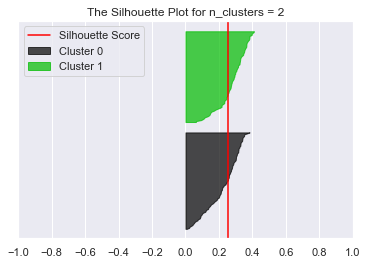

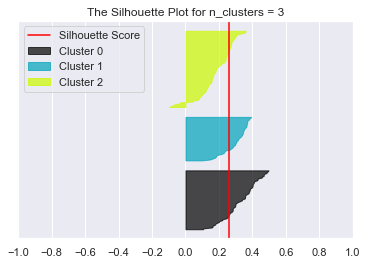

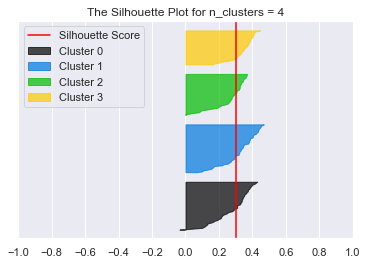

In [73]:
from pylab import figure
for i, k in enumerate([2, 3, 4]):
    figure(i)
    draw_silhouette_plot(X, k)

In [74]:
kmeans = KMeans(n_clusters=4, random_state=69).fit(X)

In [75]:
#Reverse the Stamdard Scaling 
centers = scaler.inverse_transform(kmeans.cluster_centers_)
#View the cluster centers as a pandas table
pd.DataFrame(data=centers, index = [f'K{i}' for i in range(1, centers.shape[0] +1)], columns = column_names)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
K1,1.0,47.803571,58.071429,34.875000
K2,1.0,28.392857,60.428571,68.178571
K3,0.0,49.437500,62.416667,29.208333
K4,0.0,28.250000,62.000000,71.675000
